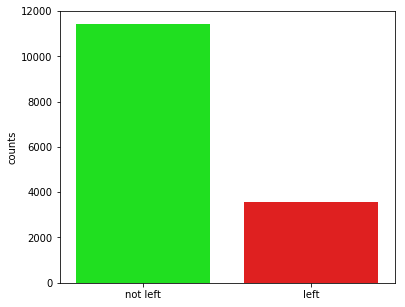

In [2]:
## Data analysis for employees leaving company.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

df = pd.read_csv('/resources/data.csv')


plt.figure(figsize=[6,5])
sb.barplot(['not left','left'],[df['left'].value_counts()[0],
                                df['left'].value_counts()[1]],
           palette={'not left':(0,1,0),'left':(1,0,0)})

plt.ylabel('counts')
plt.show()

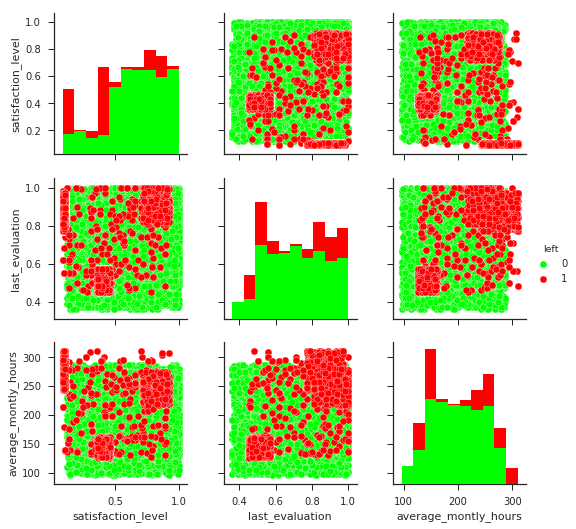

In [3]:
sb.set(style='ticks')
sb.pairplot(df, hue='left', palette = {0:(0,1,0), 1:(1.0, 0, 0)}, vars = ['satisfaction_level', 'last_evaluation','average_montly_hours',])
plt.show()

In [4]:

## After reviewing this visual plot, we can say that high number of people who left with high average monthly hours and high evaluation.
## Employees who have high average monthly hours and high satisfaction left the firm


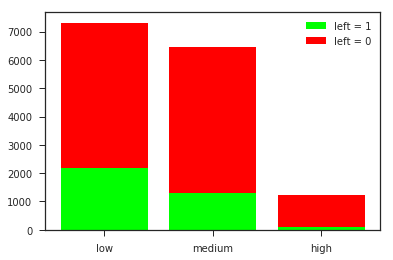

In [5]:
fig_1 = plt.figure()
kd = fig_1.add_subplot(111)
salary_mark = ['low','medium','high']

salary_left = df[df['left']== 1].salary.value_counts()[0:3]
salary_not_left = df[df['left']== 0].salary.value_counts()[0:3]


kd.bar(np.arange(len(salary_mark)), salary_left, align = 'center', color = (0, 1.0,0))
kd.bar(np.arange(len(salary_mark)), salary_not_left, align = 'center', color = (1.0, 0, 0), bottom = salary_left)
plt.legend(['left = 1', 'left = 0'])
plt.xticks(np.arange(len(salary_mark)), salary_mark)
plt.show()

In [6]:
## lets plot ratio of left/not left employees considering salary attribute

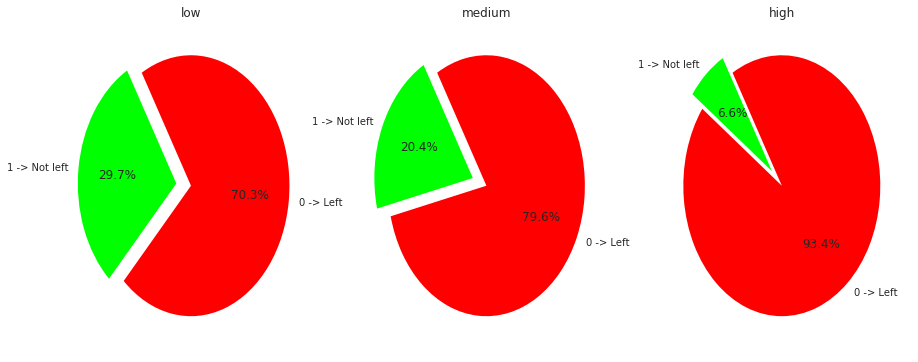

In [7]:
plt.figure(figsize = [15,6])

for k in range(0,3):
    plt.subplot(1,3,k+1)
    plt.pie([salary_left[k],salary_not_left[k]], labels = ['1 -> Not left', '0 -> Left'], startangle = 120, colors = [(0, 1.0, 0),(1.0,0,0)], explode = [0.15, 0], autopct = '%1.1f%%')
    plt.title(salary_mark[k])
plt.show()

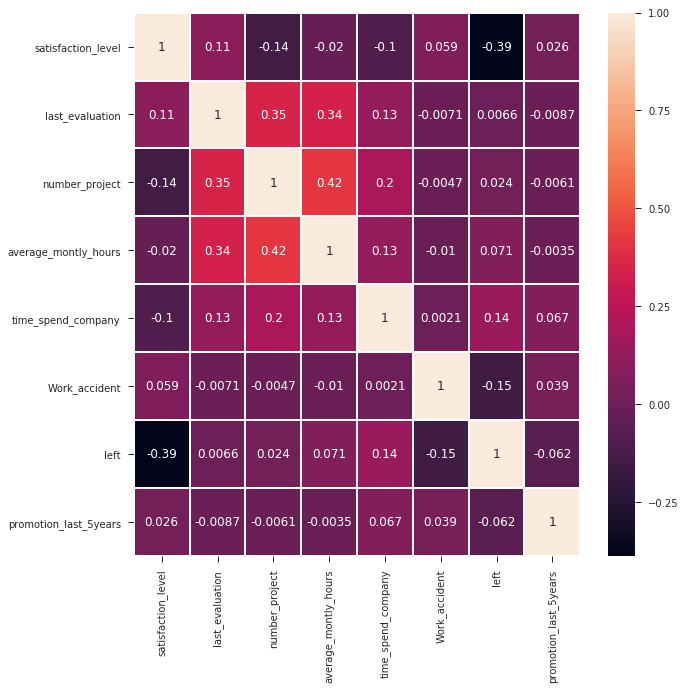

In [8]:

## Lets find correlation between salary and employees left the firm.
## We need to find correlation between all attributes

fig, ax = plt.subplots(figsize=(10,10)) 
correlation = df.corr()
sb.heatmap(correlation, annot = True, linewidths = 1, ax=ax)
plt.show()

In [9]:
## We can see that there is negative correlation between satisfaction level and left attributes.
## There is positive correlation beween number of projects to average monthly hours...which is not our area of interest. 
## So lets consider positive correlation betwen number of projects to last evaluation..which is high.


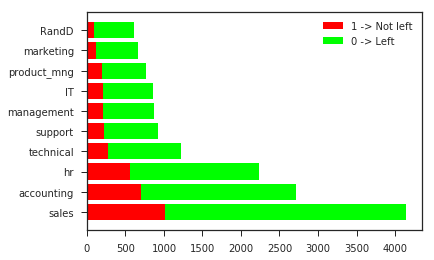

In [10]:
# now lets consider sales column to find out why employees left the company.

fig = plt.figure()
kd = fig.add_subplot(111)
sales_mark = df.sales.unique()

sales_left = df[df['left']== 1].sales.value_counts()[:]
sales_not_left = df[df['left']== 0].sales.value_counts()[:]

kd.barh(np.arange(len(sales_mark)), sales_left, align = 'center', color=(1.0,0,0))
kd.barh(np.arange(len(sales_mark)), sales_not_left, align = 'center', color=(0,1.0,0), left = sales_left)

plt.legend(['1 -> Not left','0 -> Left'])
plt.yticks(np.arange(len(sales_mark)),sales_mark)
plt.show()

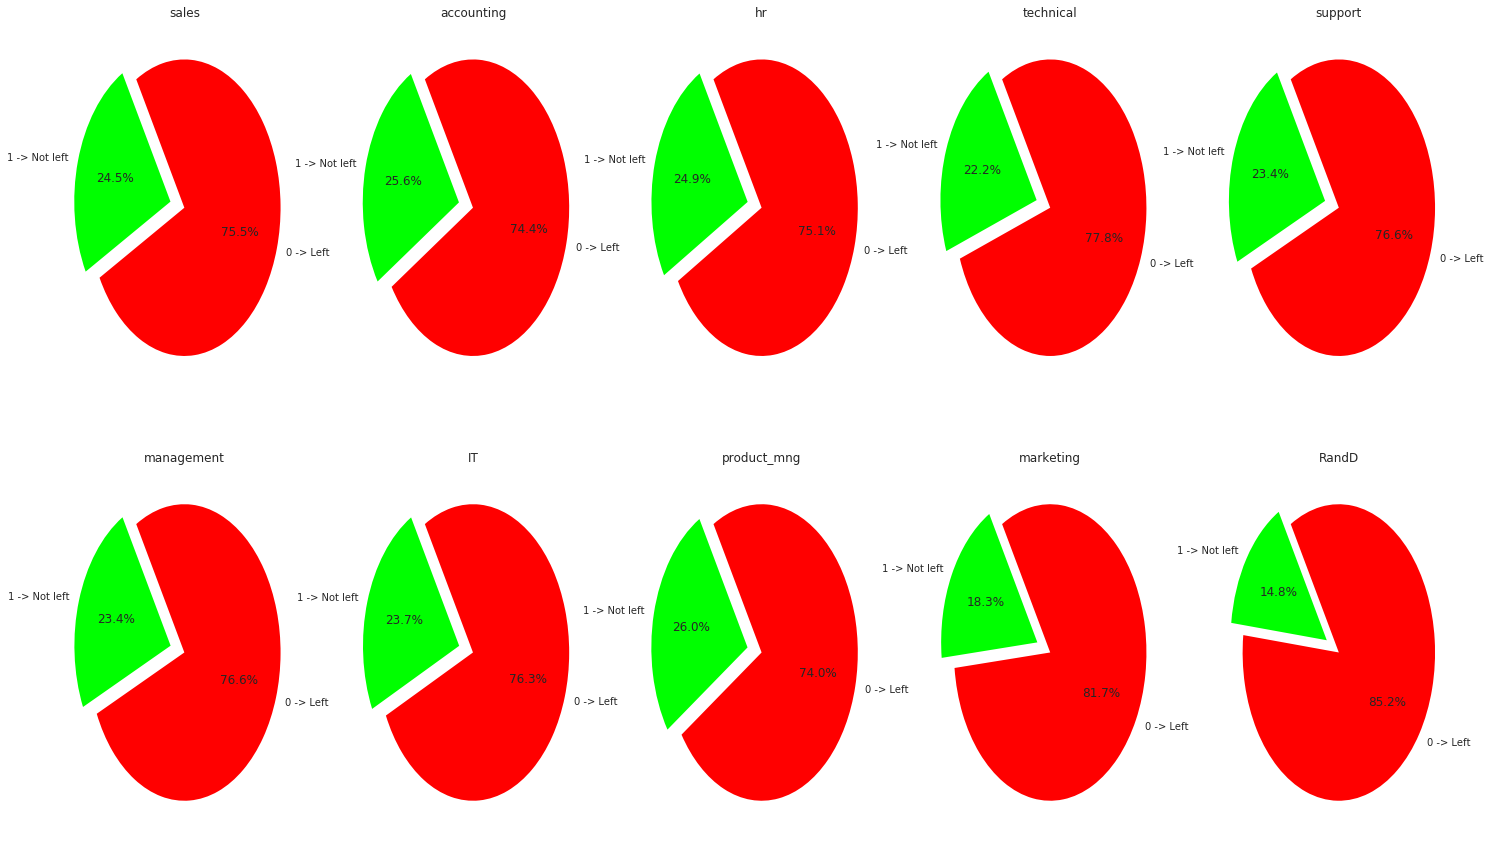

In [11]:
## Lets find ratio of sales left vs not left

plt.figure(figsize = [25,15])

for k in range(0,len(sales_mark)):
    plt.subplot(2,len(sales_mark)/2, k+1)
    plt.pie([sales_left[k],sales_not_left[k]], labels = ['1 -> Not left', '0 -> Left'], startangle = 120, colors = [(0,1,0),(1,0,0)], autopct = '%1.1f%%', explode=[0.15,0])
    plt.title(sales_mark[k])

plt.show()

In [12]:
## Above graph shows that product manager and accounting team employees are leaving the company most.
## R&D department employees are the most stable one.

## Now lets see what makes product manger leave the company.


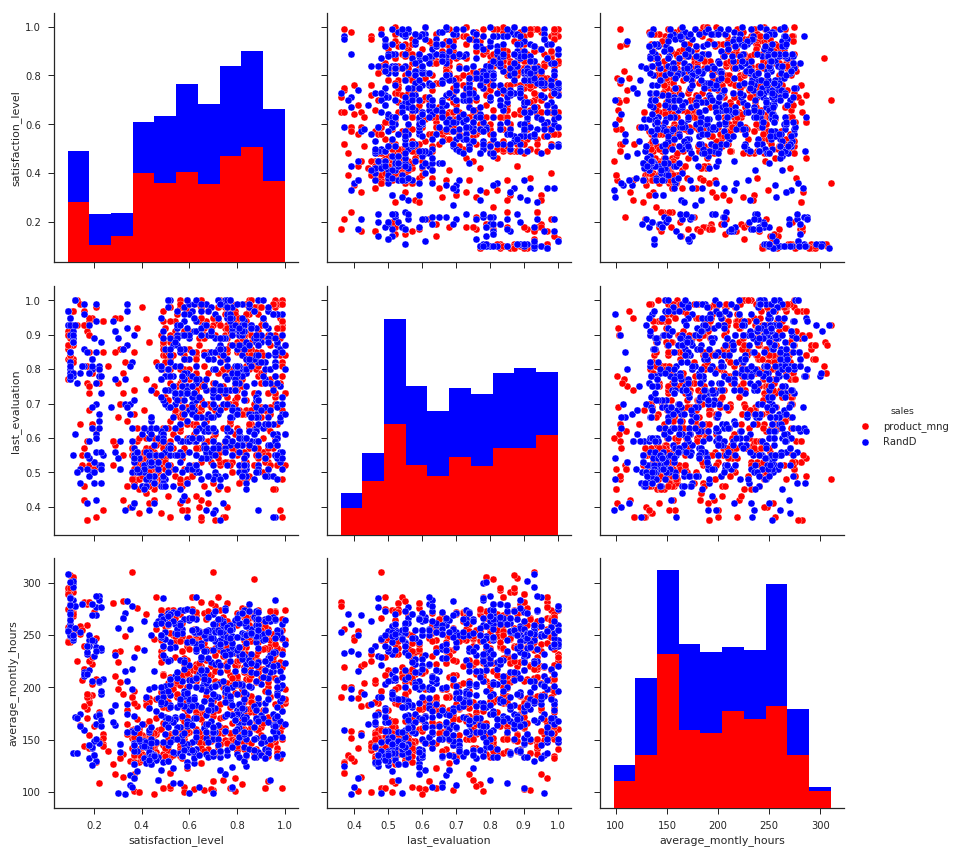

In [13]:
sb.set(style = 'ticks')
sb.pairplot(df[(df['sales']== 'product_mng') | (df['sales'] == 'RandD')], hue = 'sales', palette = {'product_mng': 'red', 'RandD':'blue'}, vars = ['satisfaction_level','last_evaluation','average_montly_hours'], size = 4)
plt.show()
                                                                                                                                                

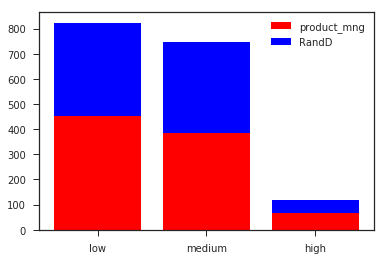

In [14]:
## Opps! seems like these three attributes doesnt make any effect.
## May be salary is the only root cause for this. Lets find out


fig = plt.figure()
fg2 = fig.add_subplot(111)
salary_mark = ['low','medium','high']

Product_mng_salary = df[df['sales'] == 'product_mng'].salary.value_counts()[0:3]
RD_salary = df[df['sales'] == 'RandD'].salary.value_counts()[0:3]

fg2.bar(np.arange(len(salary_mark)),Product_mng_salary,align='center',color='red')
fg2.bar(np.arange(len(salary_mark)), RD_salary, align = 'center', color = 'blue', bottom = Product_mng_salary)

plt.legend(['product_mng','RandD'])
plt.xticks(np.arange(len(salary_mark)),salary_mark)
plt.show()

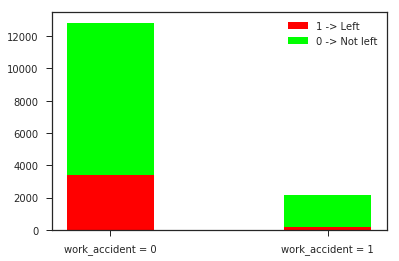

In [15]:
## Again, it seems like both distribution is almost same. Lets consider more parameters. (Work Accident)


fig = plt.figure()
fg3 = fig.add_subplot(111)
work_acc = ['work_accident = 0','work_accident = 1']
WA_left = df[df['left'] == 1].Work_accident.value_counts()[:]
WA_not_left = df[df['left'] == 0].Work_accident.value_counts()[:]


fg3.bar(np.arange(len(work_acc)), WA_left, align = 'center', color=(1,0,0), width = 0.4)
fg3.bar(np.arange(len(work_acc)), WA_not_left, align = 'center', color=(0,1,0), width = 0.4, bottom = WA_left)

plt.legend(['1 -> Left', '0 -> Not left'])
plt.xticks(np.arange(len(work_acc)),work_acc)
plt.show()

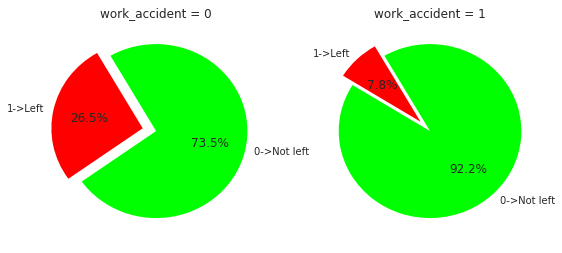

In [16]:
## Result is not very interesting. Lets plot its ratio.


plt.figure(figsize=[9,4])

for k in range(len(work_acc)):
    plt.subplot(1,len(work_acc), k+1)
    plt.pie([WA_left[k],WA_not_left[k]], labels = ['1->Left','0->Not left'], startangle = 120, colors = [(1,0,0),(0,1,0)], autopct = '%1.1f%%', explode = [0.15,0])
    plt.title(work_acc[k])

plt.show()

In [17]:
## Trying some prediction modeling now. 
## Logistic Regression from sklearn


from sklearn.linear_model import LogisticRegression

X = df.copy() #copied dataframe to make modification.
X.salary=X.salary.map({'low':0,'medium':1, 'high':2})
X.sales=X.sales.map({'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 'management':5,
       'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9})
y=X.left
X.drop(['left'],axis=1,inplace=True)
X['hours_per_project']=X.average_montly_hours/X.number_project
X.drop(['average_montly_hours','number_project'],axis=1,inplace=True)

In [18]:
## split data for training and testing


from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.50)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null int64
salary                   14999 non-null int64
hours_per_project        14999 non-null float64
dtypes: float64(3), int64(5)
memory usage: 937.5 KB


In [19]:
#LOGISTIC REGRESSION
model_lr = LogisticRegression(C=.1)
model_lr.fit(X_train,y_train)
model_lr.score(X_test, y_test)

0.78666666666666663

In [20]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg.fit(X_train,y_train)
model_linreg.score(X_test,y_test)

0.20086511374820926

In [21]:
## I dont think so we what this bad result. :D
## A confusion matrix is a technique for summarizing the performance of a classification algorithm. Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.
## Lets make confusion matrix for logistic Regression


from sklearn.metrics import confusion_matrix
y_predict = model_lr.predict(X_test)
conf_mat = confusion_matrix(y_test, y_predict)
print "Confusion Matrix for Logistic Regression\n", conf_mat

Confusion Matrix for Logistic Regression
[[5316  391]
 [1209  584]]


In [22]:
precision = float(conf_mat[0,0])/(conf_mat[0,0] + conf_mat[0,1])
recall = float(conf_mat[0,0])/(conf_mat[0,0] + conf_mat[1,0])
print "Logistic Regression model Precision and Recall factors\n"
print "Precision: ", precision, "Recall:", recall

Logistic Regression model Precision and Recall factors

Precision:  0.93148764675 Recall: 0.814712643678


In [23]:
#Lets try SVM

from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)
model_svm.score(X_test,y_test)

0.91066666666666662

In [24]:
y_predict = model_svm.predict(X_test)
conf_mat = confusion_matrix(y_test, y_predict)
print "Confusion Matrix for SVM\n", conf_mat

Confusion Matrix for SVM
[[5395  312]
 [ 358 1435]]


In [25]:
precision = float(conf_mat[0,0])/(conf_mat[0,0] + conf_mat[0,1])
recall = float(conf_mat[0,0])/(conf_mat[0,0] + conf_mat[1,0])
print "SVM model Precision and Recall factors\n"
print "Precision: ", precision, "Recall:", recall

SVM model Precision and Recall factors

Precision:  0.945330296128 Recall: 0.937771597427


In [26]:
'''
Good results...Lets try some more models. KNN --->>
'''

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(X_train, y_train)
model_knn.score(X_test,y_test)

0.87586666666666668

In [27]:
## Not good as SVM. SO we are not calculating its recall factor.
## Try RandomForest


from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 0)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.98440000000000005

In [28]:
## Awesome :)) 
# Lets find out its recall.
y_predict = model_rf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_predict)
print "Confusion Matrix for Random Forest\n", conf_mat

Confusion Matrix for Random Forest
[[5683   24]
 [  93 1700]]


In [29]:
precision = float(conf_mat[0,0])/(conf_mat[0,0] + conf_mat[0,1])
recall = float(conf_mat[0,0])/(conf_mat[0,0] + conf_mat[1,0])
print "Random Forest model Precision and Recall factors\n"
print "Precision: ", precision, "Recall:", recall

Random Forest model Precision and Recall factors

Precision:  0.995794638164 Recall: 0.983898891967


In [30]:
## Random forest works awesome with 0.97 score and 0.98 recall factor. 
## Lets find which attribute makes employees leaving the company.

from sklearn.cross_validation import cross_val_score
print cross_val_score(model_rf,X,y,cv= 10)

[ 0.99533644  0.996       0.976       0.974       0.97066667  0.98866667
  0.99733333  0.996       0.99933289  0.99933289]


In [31]:
print pd.DataFrame([X.columns, model_rf.feature_importances_])

                    0                1                   2              3  \
0  satisfaction_level  last_evaluation  time_spend_company  Work_accident   
1            0.472327         0.118991            0.206034      0.0144925   

                       4          5          6                  7  
0  promotion_last_5years      sales     salary  hours_per_project  
1             0.00137168  0.0185235  0.0159262           0.152333  


In [32]:
## O-o Satisfaction level affects the most. 
## "Employees are leaving because they are not satisfied with their work. Company should improve some features to satisfie their emplyees...
